In [1]:
import ast
import pickle
import torch
from tqdm import tqdm
import sys
import numpy as np
sys.path.append("/home/savi/ehsan/FederatedLearning")
import matplotlib.pyplot as plt
from federated_learning.helper import utils
from sklearn.decomposition import PCA

In [20]:
def get_all_params_flattend(model_state):
    params = np.array([], dtype=np.float32)
    params = np.concatenate((params, model_state['fc2.bias'].reshape(-1)))
#     for ll_name, ll_data in model_state.items():
#         params = np.concatenate((params, ll_data.reshape(-1)))
    return params

def draw_pca_model(params_list, colors, title):
    pca = PCA(n_components=2)
    proj = pca.fit_transform(params_list)
    figure = plt.figure(figsize=(18, 8))
#     plt.colorbar(ticks=range(len(params_list)))
#     plt.title(title)
    plt.scatter(proj[:, 0], proj[:,1], c = colors, cmap="rainbow") #gist_rainbow

<ipython-input-20-e48aa7654644>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize=(18, 8))


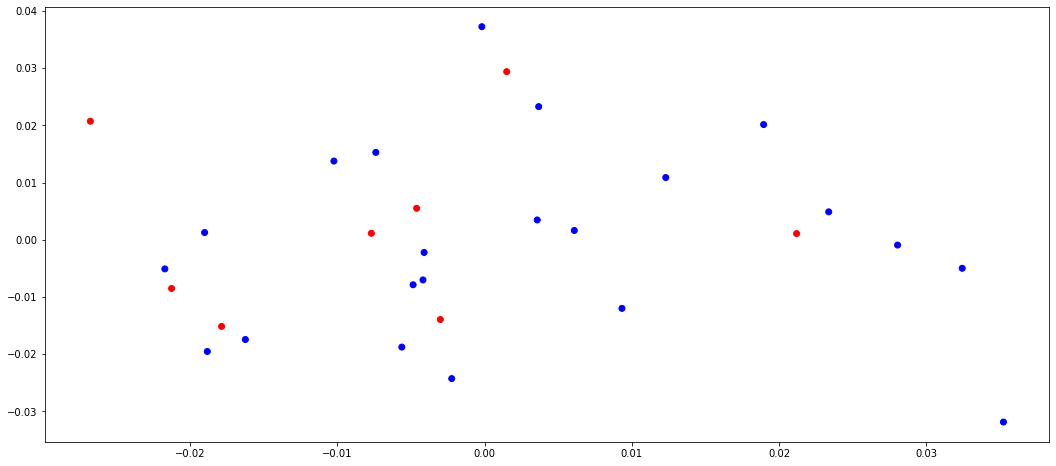

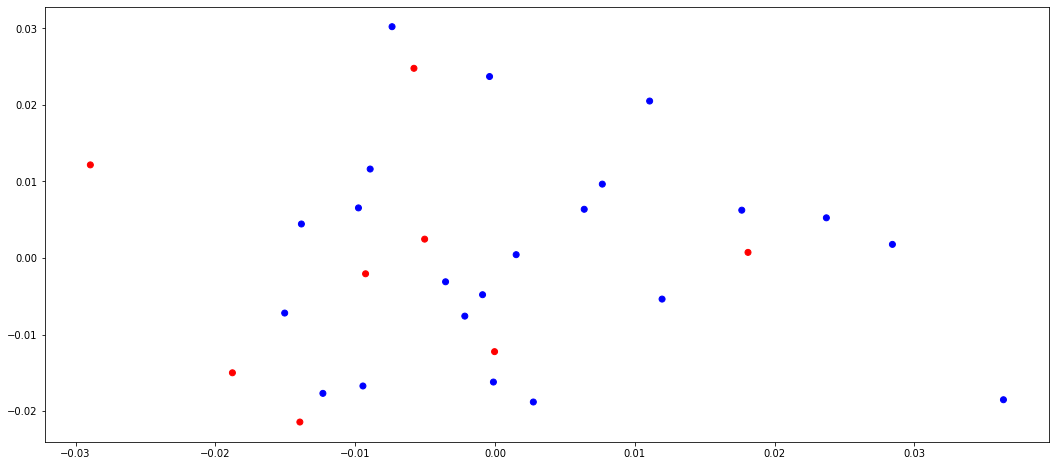

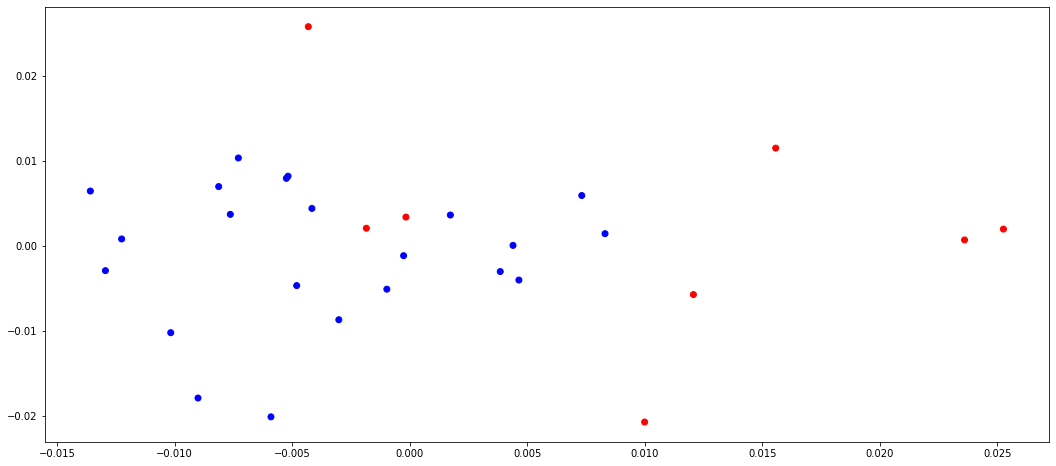

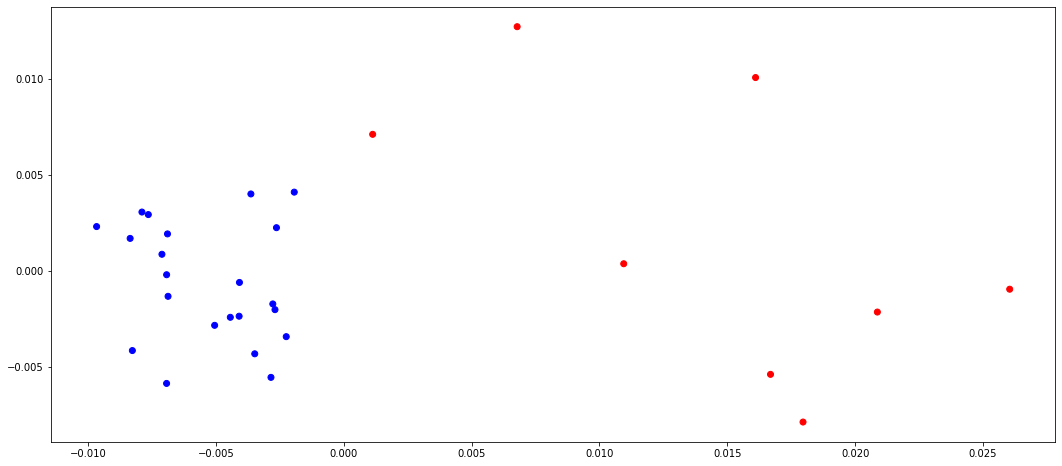

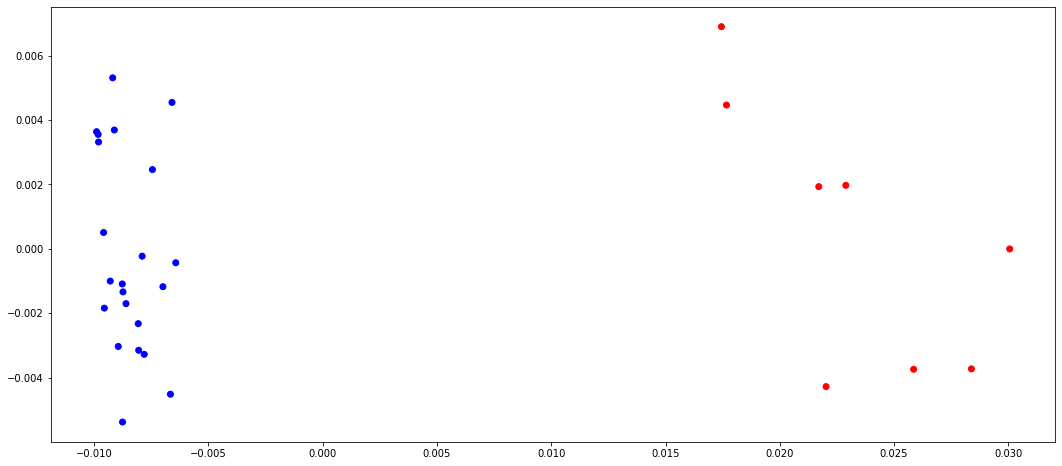

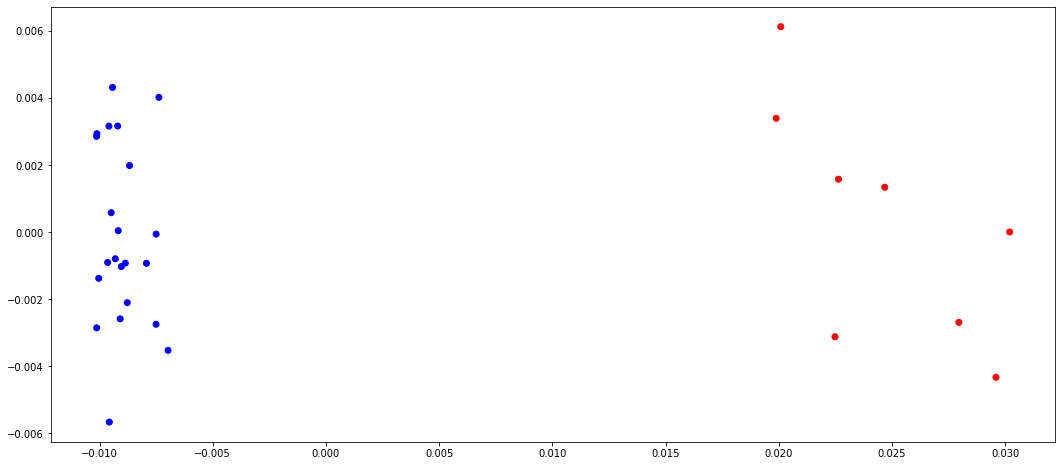

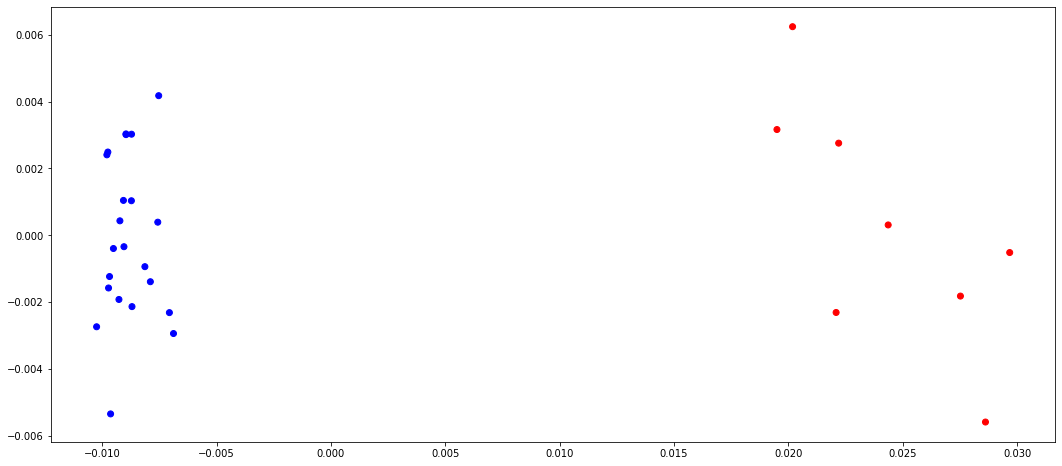

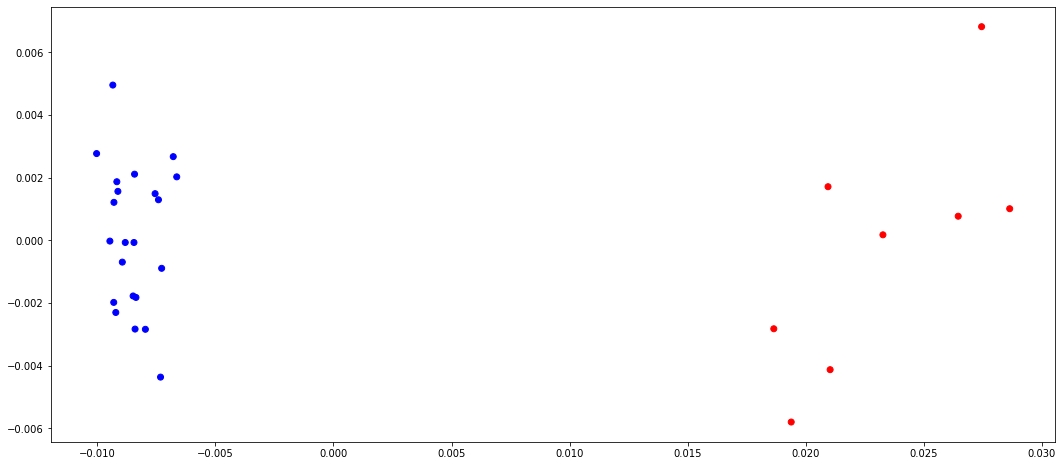

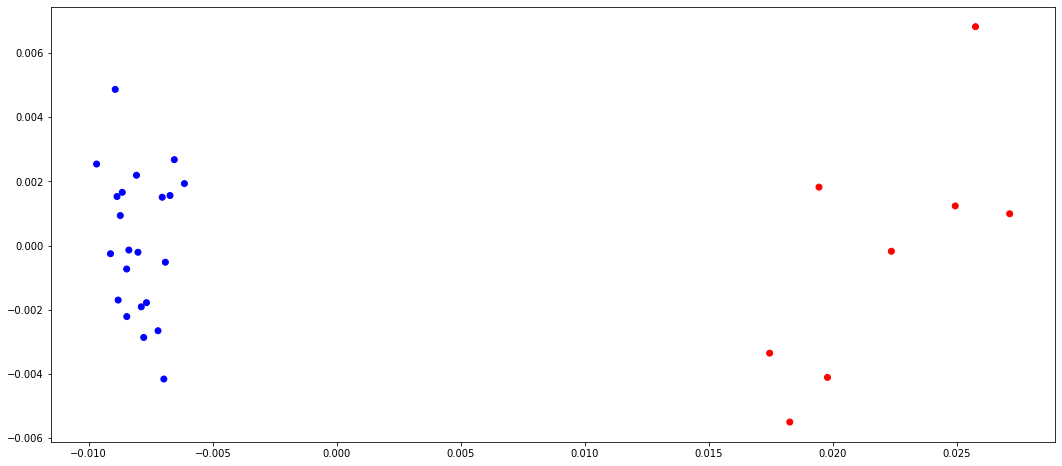

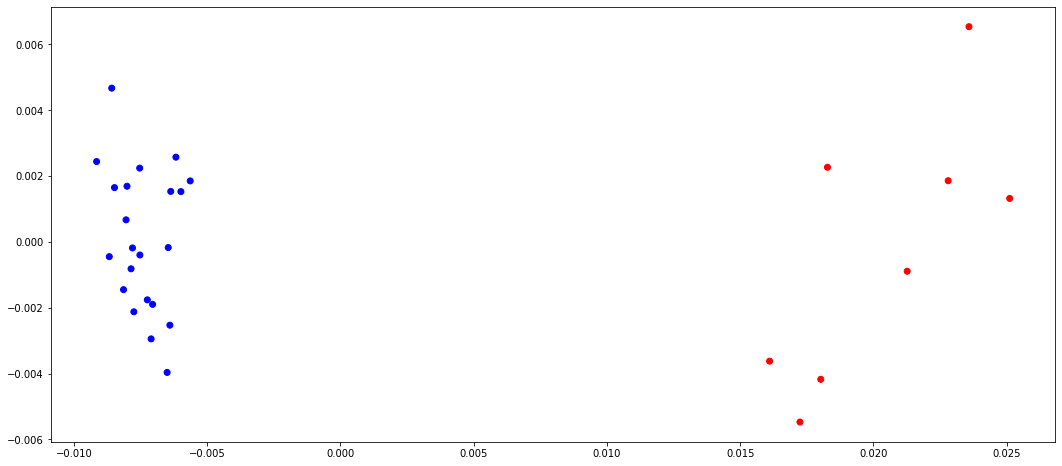

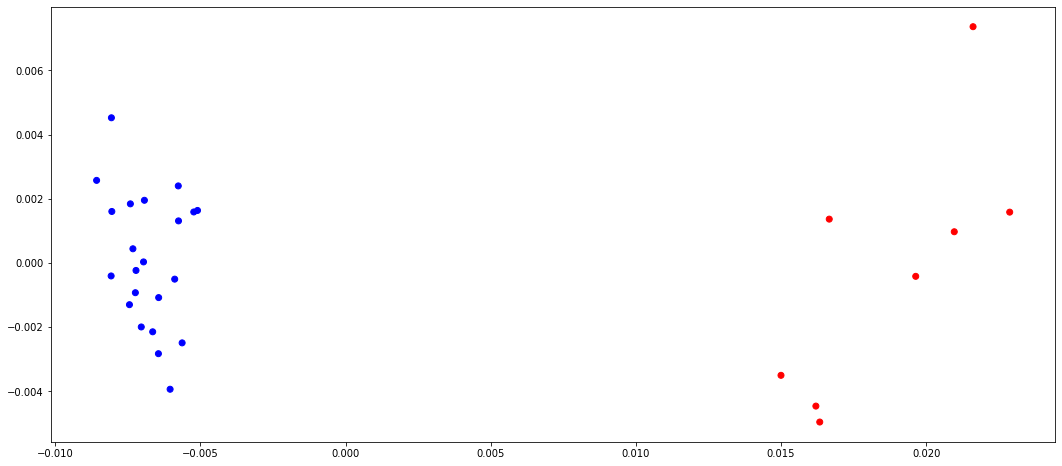

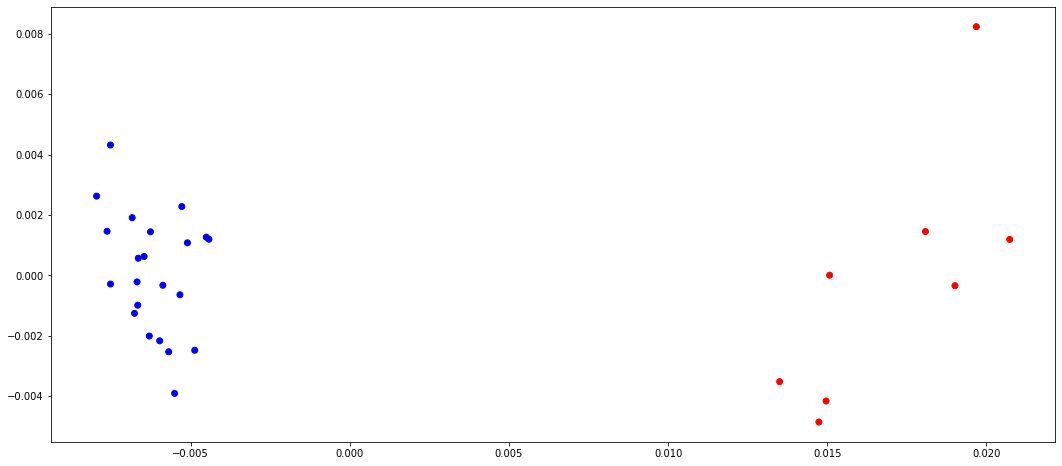

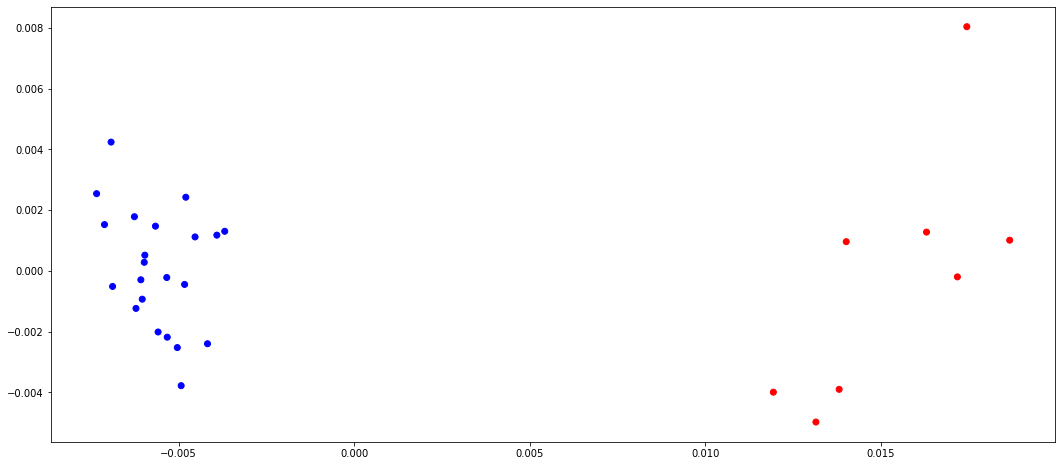

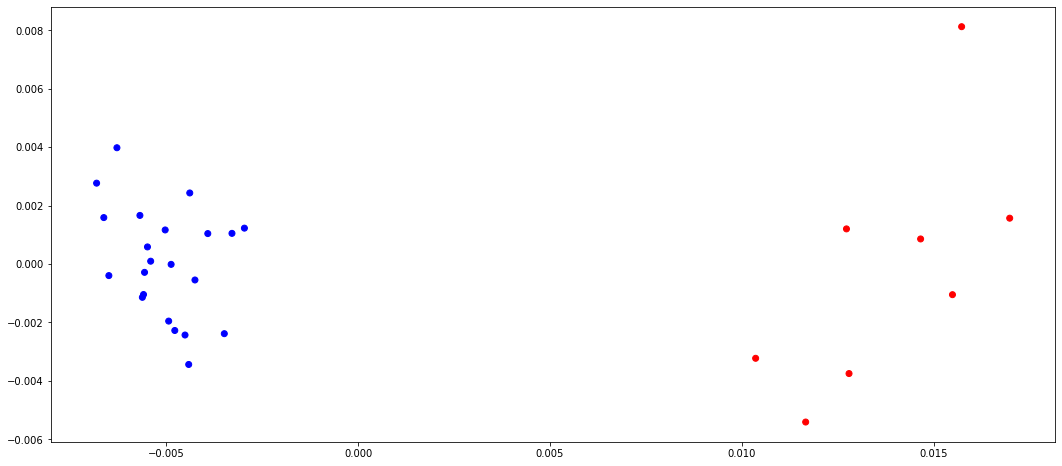

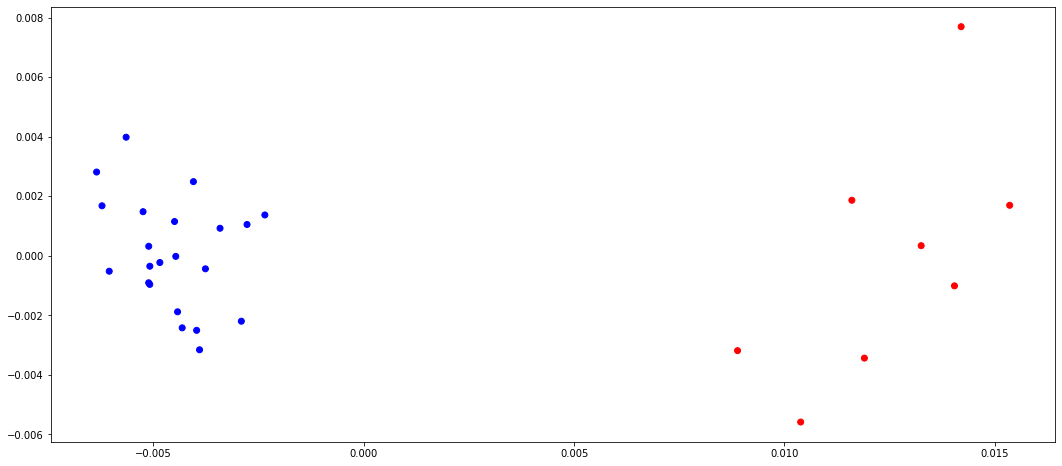

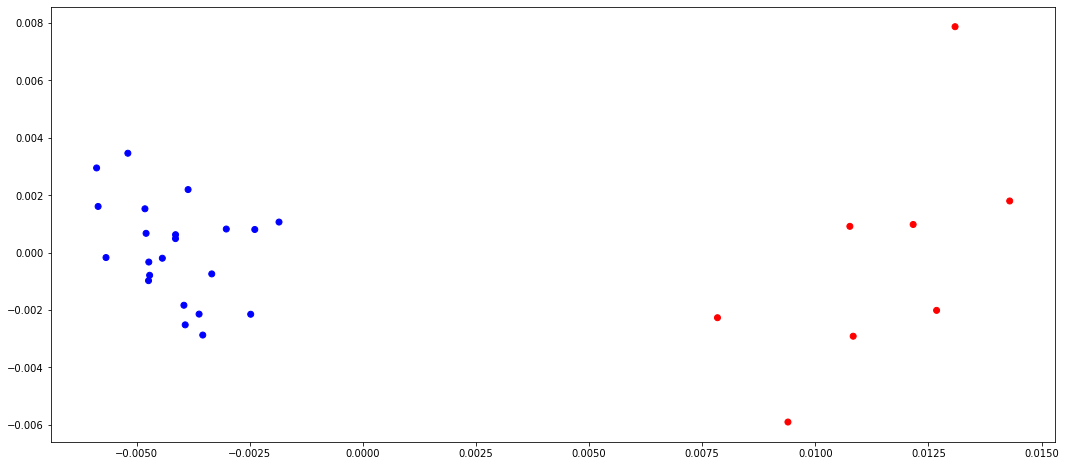

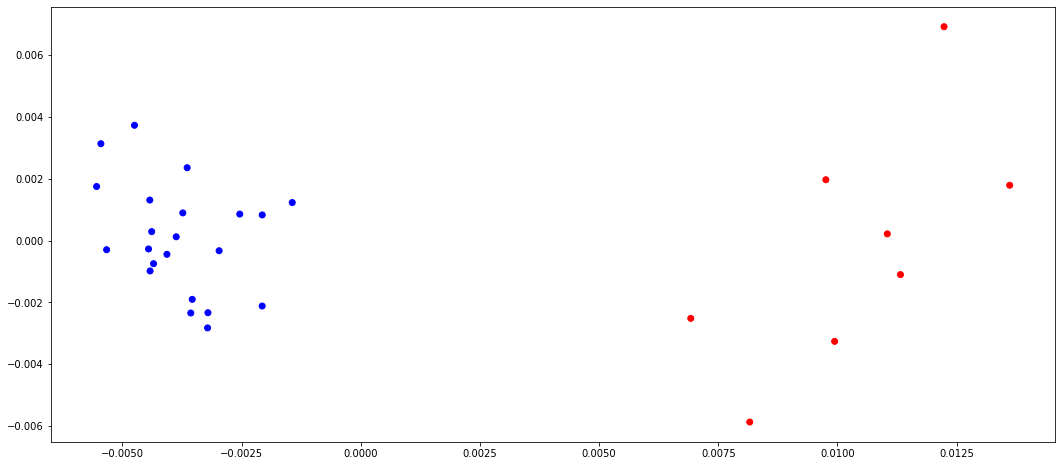

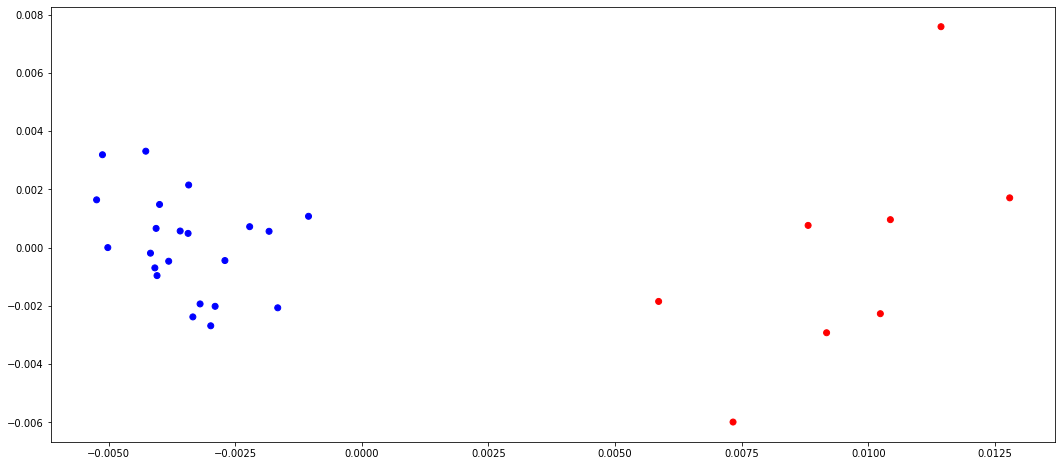

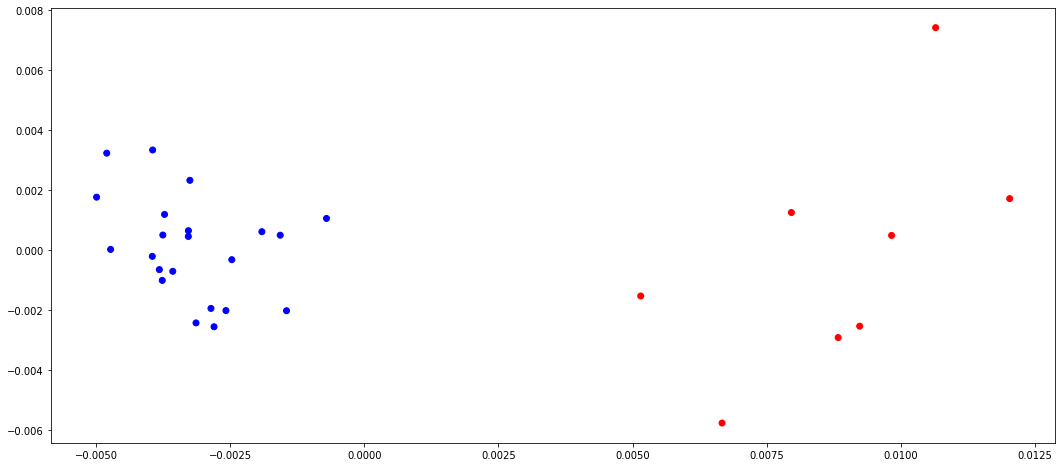

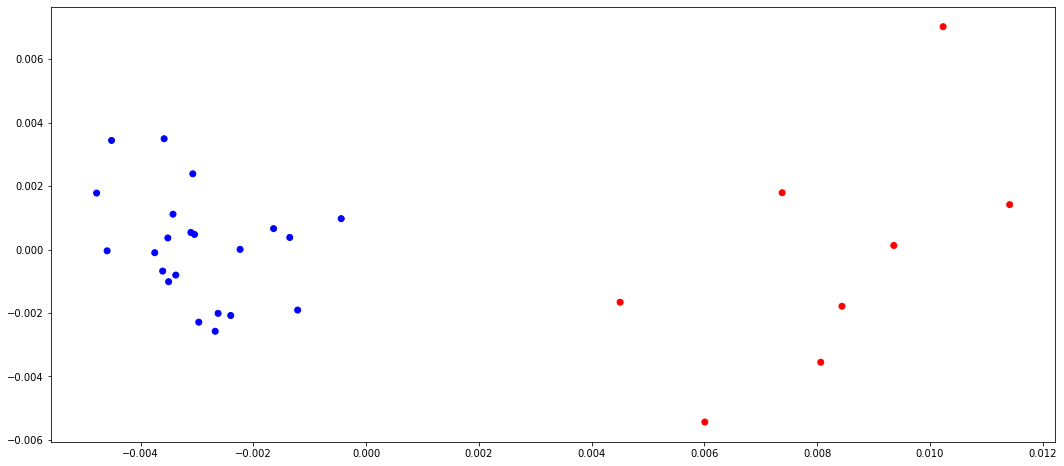

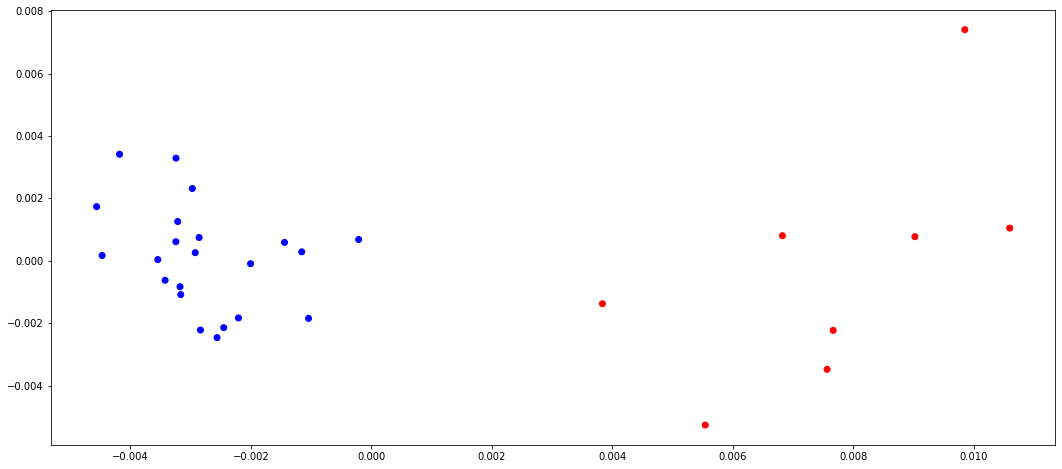

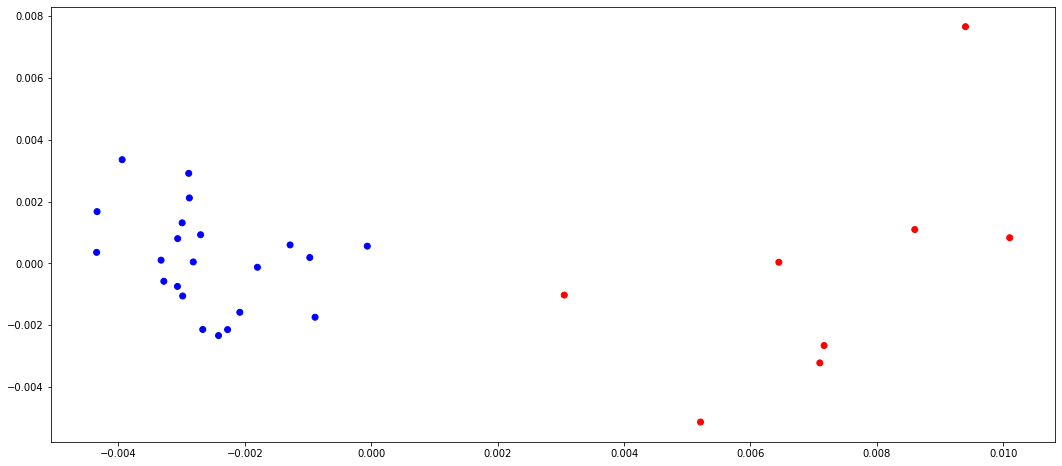

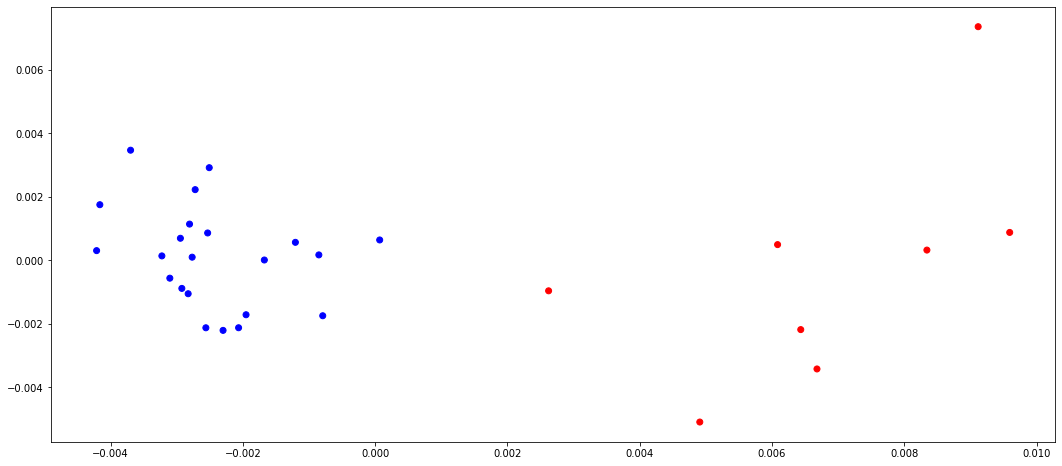

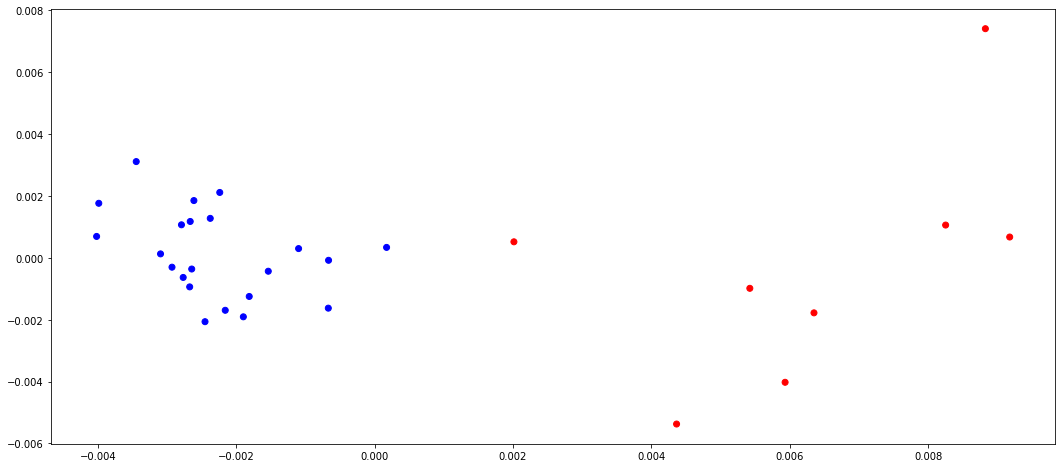

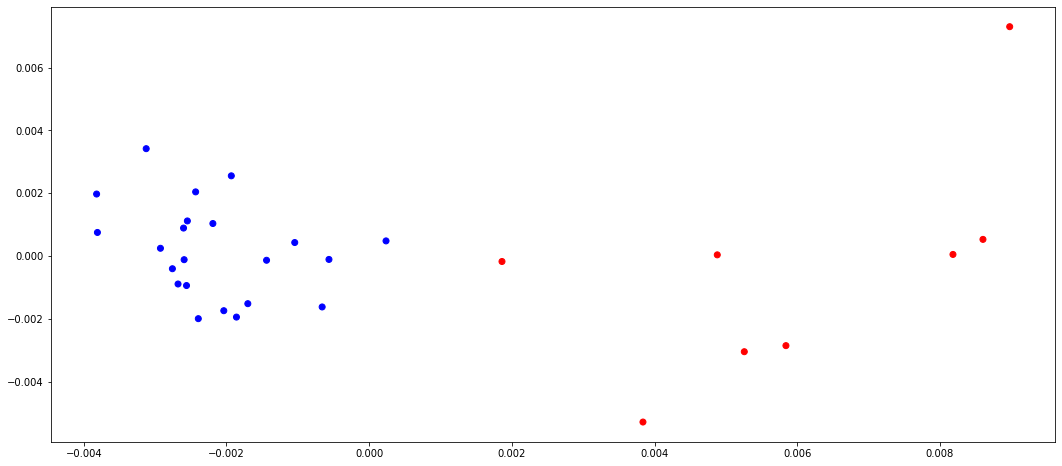

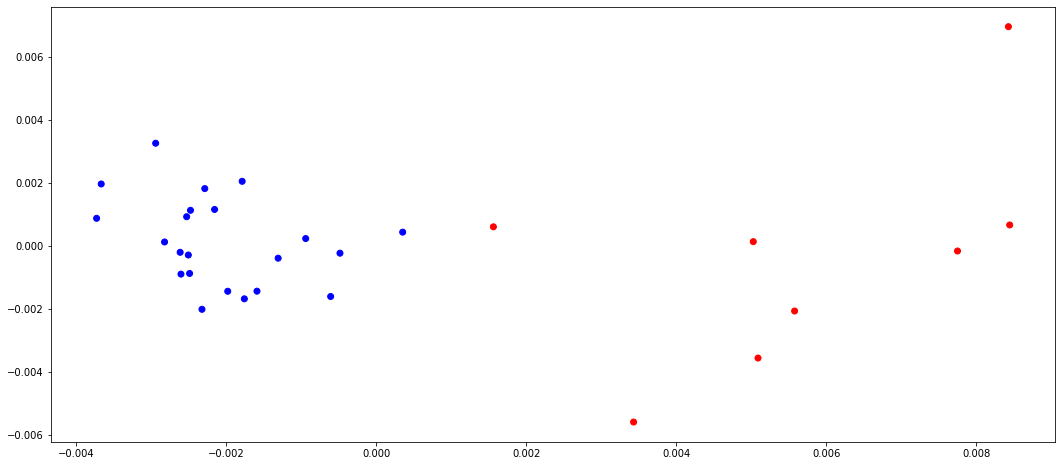

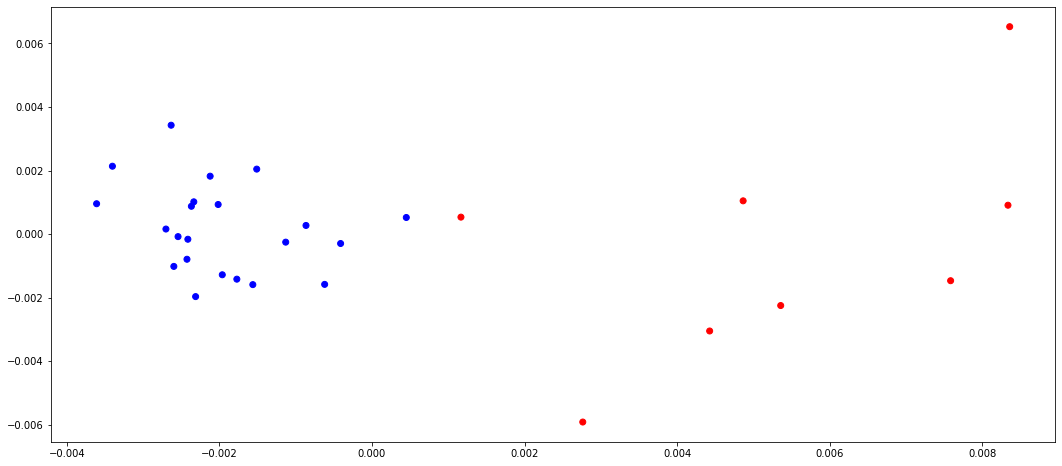

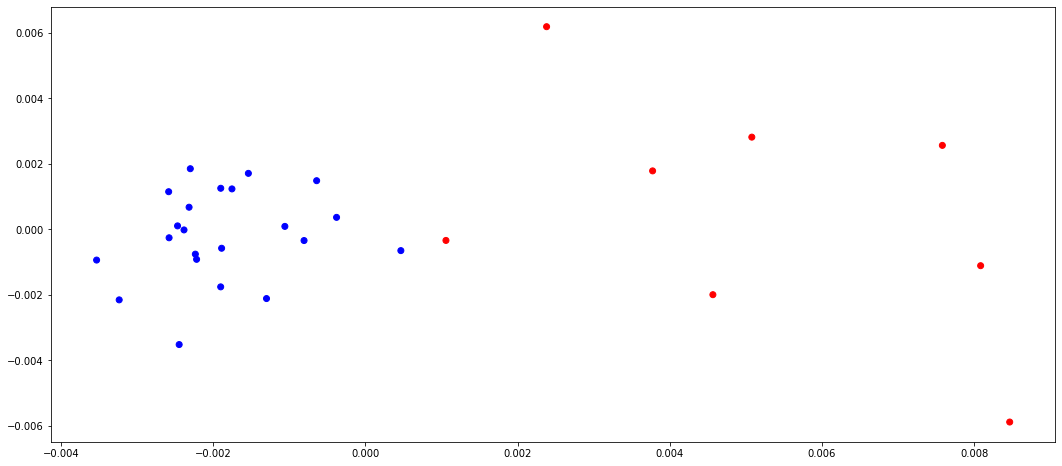

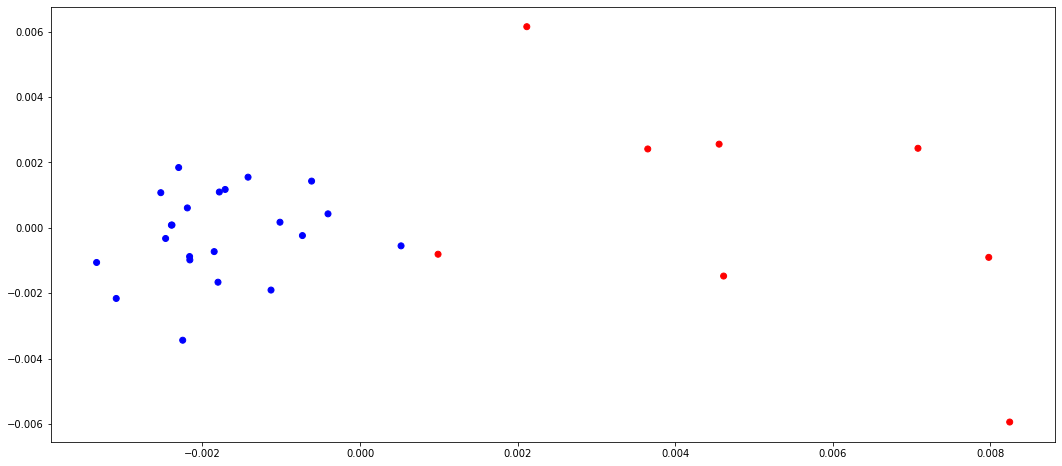

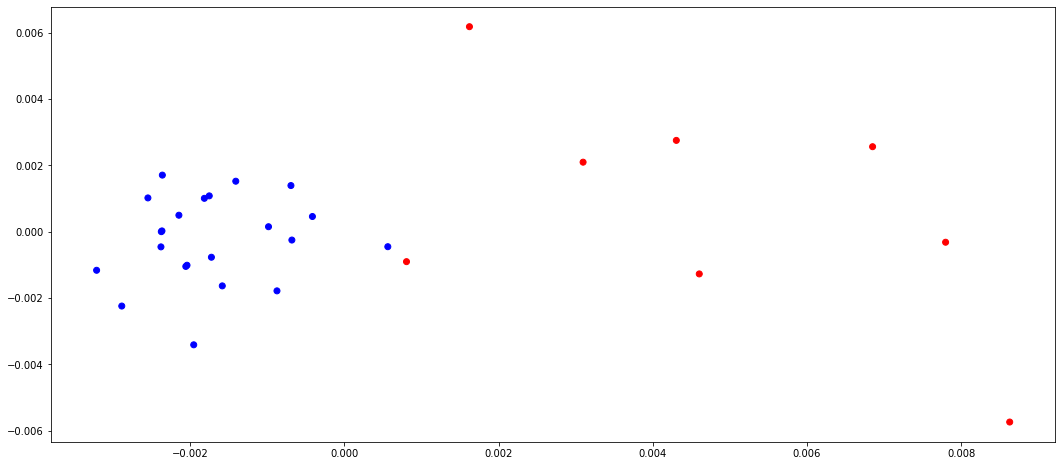

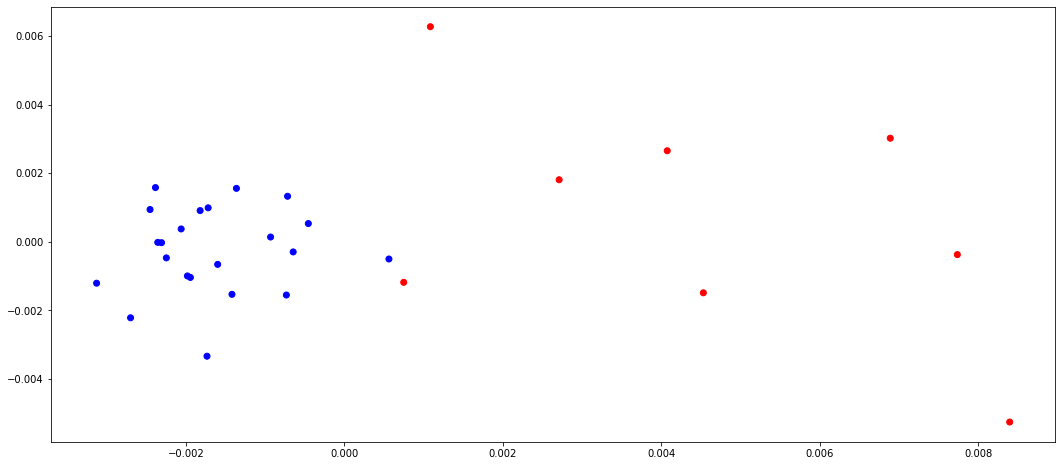

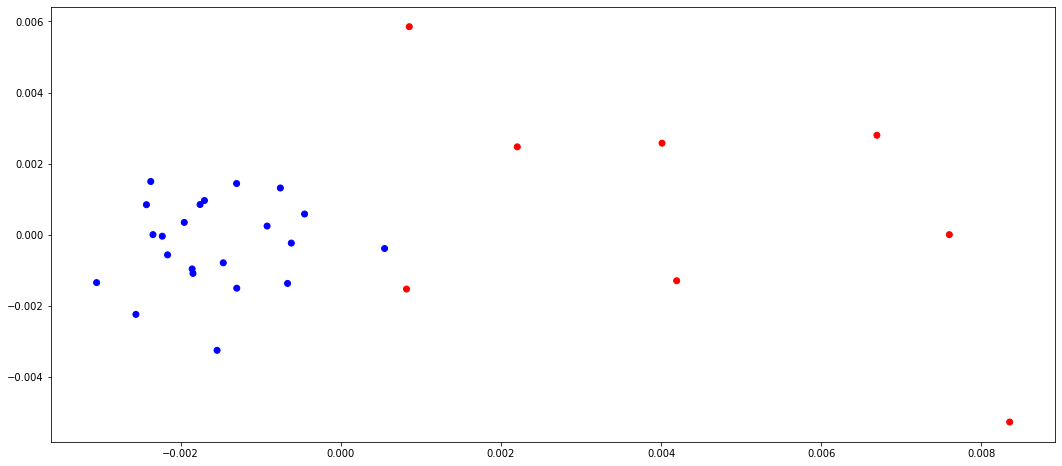

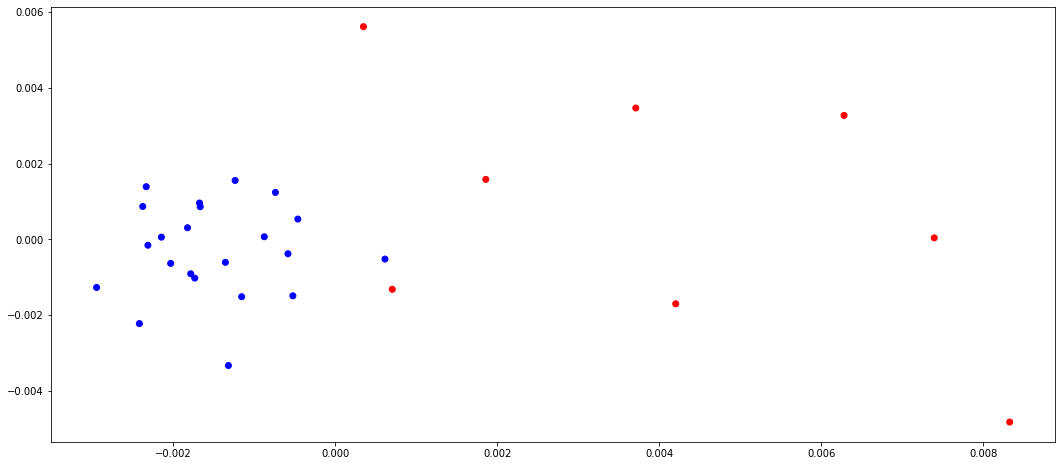

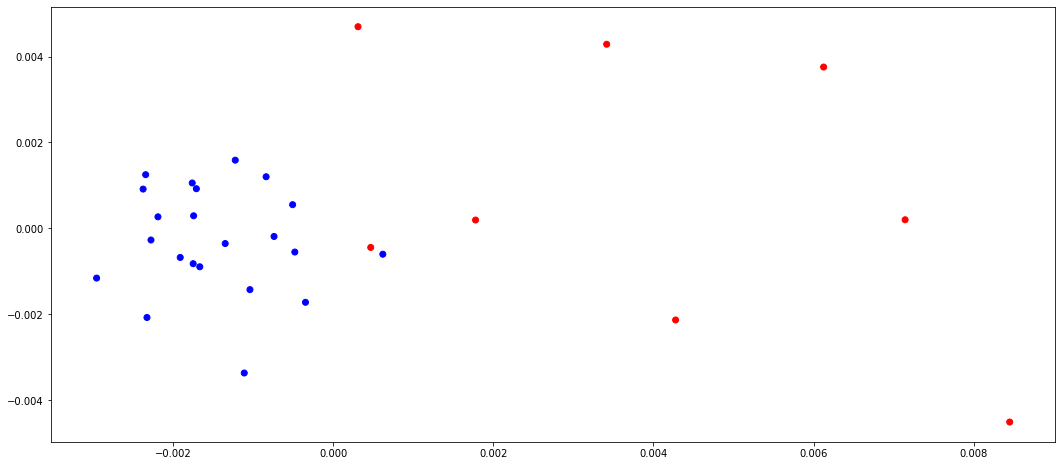

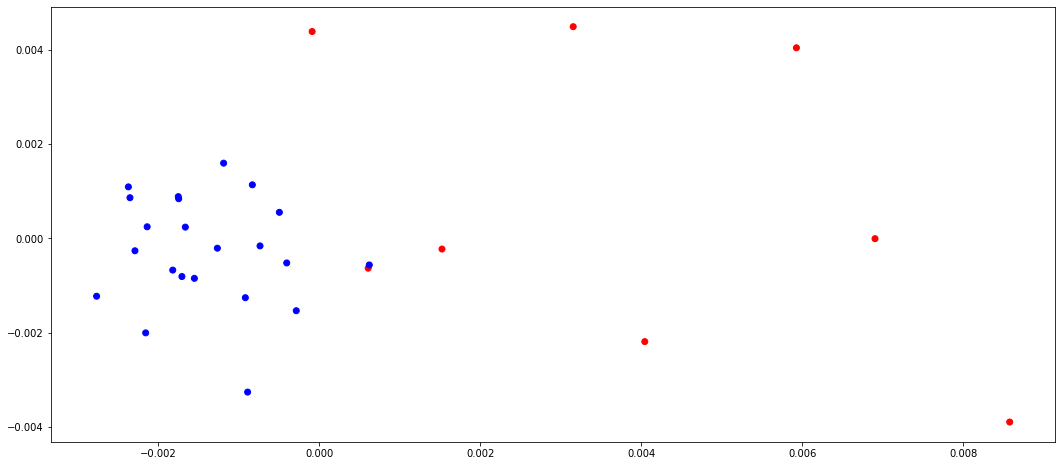

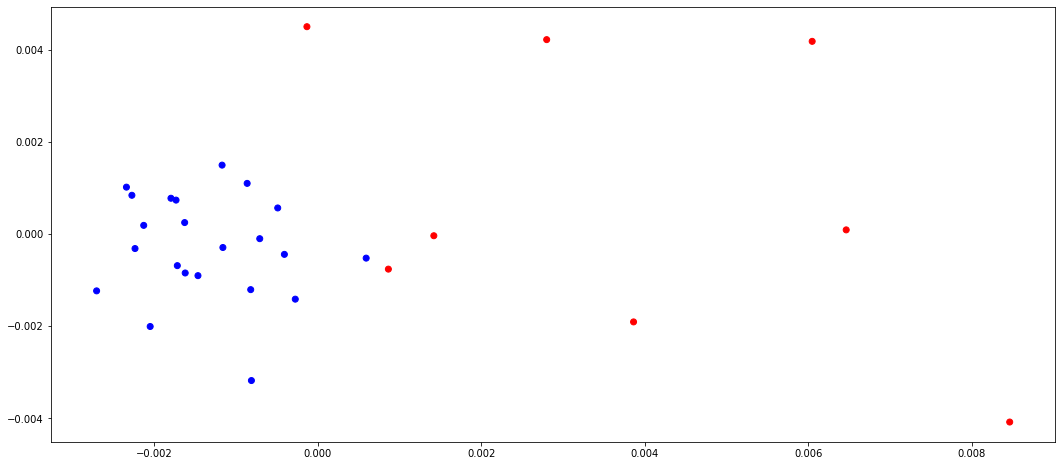

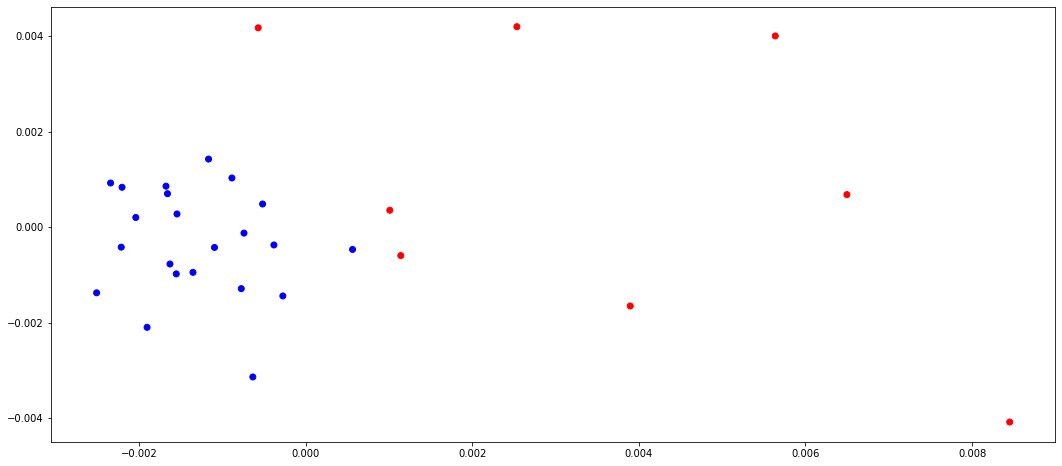

In [22]:
log_path = "/home/savi/ehsan/FederatedLearning/data_output/20210225_201945_pca_iid_avg_atk8_SAN_867"
last_round = int(utils.get_last_round_num(log_path, "accuracy"))
attackers_idx = utils.load_object(log_path, "attackers")

all_params = np.array([], dtype=np.float32).reshape(-1, 431570) 
    # 431570 is the nmber of all params in a model

attackers_num = len(attackers_idx)
workers_idx = ["worker_{}".format(ii) for ii in range(30)]
normal_idx = set(workers_idx) - set(attackers_idx)

color = []
for ww in workers_idx:
    if ww in attackers_idx:
        color.append("red")
    else:
        color.append("blue")
        
for round_no in range(last_round):
    type_name = "iid_p"
    all_params = np.array([], dtype=np.float32).reshape(-1, 10) 
    # 431080 is the nmber of all params in a model
    for ww in workers_idx:
        model_path = "{}/models/workers_R{}/{}_{}_{}_R{}".format(
            log_path, round_no,
            type_name, attackers_num, ww, round_no)
        params = get_all_params_flattend(torch.load(model_path)).reshape(1, -1)
        all_params = np.concatenate((all_params, params))


    draw_pca_model(all_params,color ,"")
    # pca = PCA(n_components=2)
# points = pca.fit_transform(all_params)
# points_with_type = []
# for ww_ii, ww in enumerate(workers_idx):
#     id_ = "1" if ww in attackers_idx else "2"
#     points_with_type.append([id_] + points[ww_ii].tolist())
# return points_with_type